# Ad Click Prediction
***

## Importing Libraries

In [1]:
#import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report , confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

## Load Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
shape = dataset.shape
print('Dataset Shape:', shape)

Dataset Shape: (400, 5)


In [4]:
dataset.head(10)  #top 10 rows

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


## Info of Dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
#number of null values in each column
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
#Change User ID column name to UserID
dataset = dataset.rename(columns={'User ID': 'UserID'})
dataset

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
#check for duplicated User ID
print("Are UserIDs unique?", dataset.UserID.is_unique)

Are UserIDs unique? True


## Visualizing Data

### <font color = 'blue'>Count plot: </font>

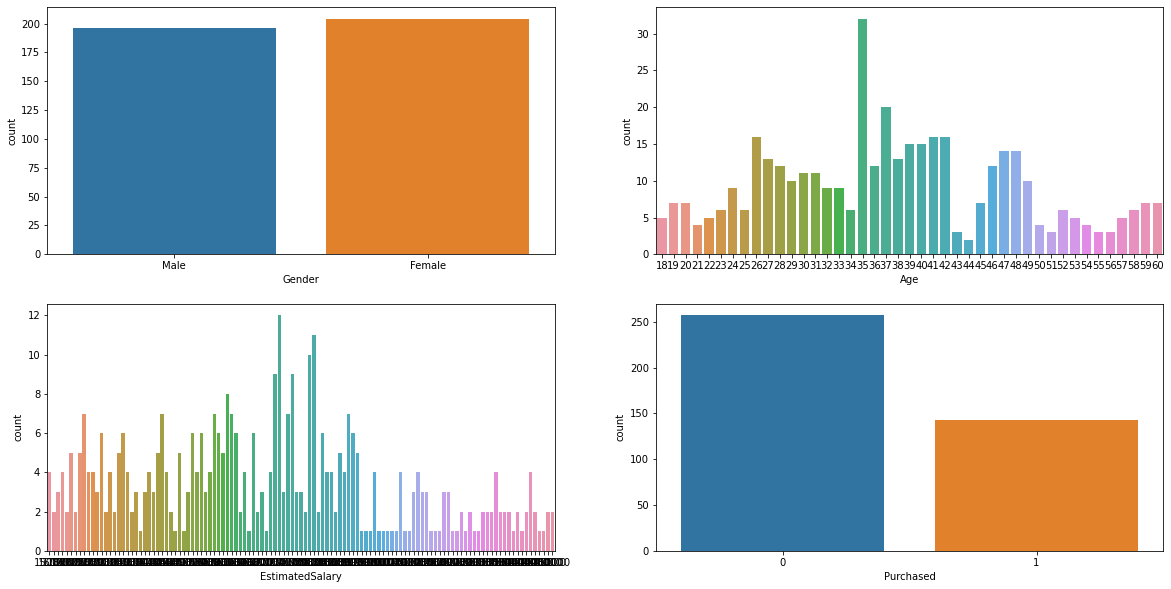

In [10]:
fg, ax = plt.subplots(2 , 2,figsize=(20,10))
for i in range(1 , len(dataset.columns)):
    x = i - 1;
    sns.countplot(x = dataset.columns[i], data = dataset, ax=ax[(int)(x / 2)][(int)(x % 2)]);

### <font color = 'blue'>Dist plot: </font>

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

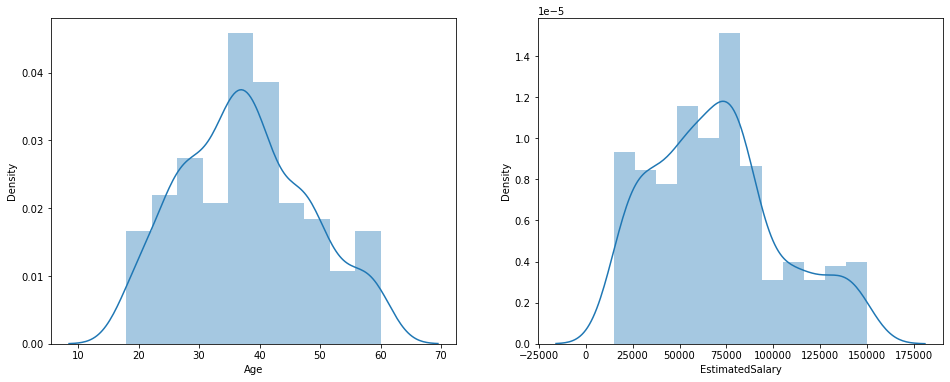

In [11]:
fg,ax = plt.subplots(1, 2, figsize = (16, 6))
sns.distplot(dataset.Age, ax = ax[0])
sns.distplot(dataset.EstimatedSalary, ax = ax[1])

## Changing the Dataset

### Convert the categorical variables into numerical form

In [12]:
Gender = pd.get_dummies(dataset['Gender'], drop_first = True)
Gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [13]:
dataset

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
dataset['Gender'] = Gender
dataset

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [15]:
dataset.drop(['UserID'], axis= 1, inplace= True)
dataset

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


## Spliting Data to X, y

In [16]:
X = dataset.iloc[:, :3]
y = dataset['Purchased']

In [17]:
#feature variable
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [18]:
#target variable
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [19]:
print('X shape', X.shape)
print('y shape', y.shape)

X shape (400, 3)
y shape (400,)


In [20]:
#number of Purchased
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Split Data to Train and Test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [22]:
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)

X train shape (280, 3)
y train shape (280,)


In [23]:
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X test shape (120, 3)
y test shape (120,)


## Scaling 

In [24]:
#from sklearn.preprocessing import MaxAbsScaler

In [25]:
# scaler = MaxAbsScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train

array([[ 1.02166316, -0.84252154,  0.1301563 ],
       [-0.97879618,  0.04175763,  0.2777019 ],
       [ 1.02166316,  0.72953032, -1.31579061],
       [-0.97879618,  1.61380949,  1.10395728],
       [ 1.02166316,  0.82778356, -1.40431797],
       [-0.97879618, -1.43204099, -1.25677236],
       [ 1.02166316, -0.05649561,  0.1301563 ],
       [ 1.02166316,  0.43477059, -0.16493491],
       [-0.97879618, -0.2530021 ,  0.01211982],
       [-0.97879618,  1.31904976,  2.22530386],
       [ 1.02166316,  0.14001087,  0.74984783],
       [-0.97879618, -1.33378775,  0.54328399],
       [-0.97879618,  2.00682245,  0.72033871],
       [ 1.02166316, -1.23553451, -1.43382709],
       [ 1.02166316,  0.33651735, -0.34198963],
       [ 1.02166316, -0.94077478,  0.54328399],
       [-0.97879618,  0.43477059,  0.2777019 ],
       [-0.97879618,  0.43477059,  1.10395728],
       [-0.97879618,  0.82778356,  0.74984783],
       [-0.97879618,  0.9260368 ,  1.25150288],
       [-0.97879618, -0.44950858, -1.256

In [27]:
X_train.min(axis=0)

array([-0.97879618, -1.9233072 , -1.64039093])

In [28]:
X_test

array([[-0.97879618,  0.82778356, -1.43382709],
       [-0.97879618,  2.10507569,  0.51377487],
       [-0.97879618, -0.94077478, -0.78462644],
       [-0.97879618,  1.02429004,  0.74984783],
       [-0.97879618, -0.84252154, -1.25677236],
       [-0.97879618, -0.7442683 , -0.25346227],
       [-0.97879618,  0.9260368 ,  1.07444816],
       [-0.97879618, -0.84252154,  0.36622926],
       [ 1.02166316,  0.23826411,  0.1301563 ],
       [ 1.02166316,  0.43477059, -0.16493491],
       [-0.97879618, -0.2530021 , -0.16493491],
       [-0.97879618,  1.51555624, -1.07971764],
       [-0.97879618, -1.43204099, -0.66658995],
       [-0.97879618, -1.72680071, -1.40431797],
       [ 1.02166316, -0.7442683 ,  0.48426575],
       [ 1.02166316, -0.2530021 ,  1.10395728],
       [-0.97879618,  1.417303  , -0.96168116],
       [-0.97879618,  0.82778356,  0.10064718],
       [ 1.02166316,  0.14001087, -0.84364468],
       [ 1.02166316,  1.81031597, -0.31248051],
       [-0.97879618, -1.53029423, -1.286

In [29]:
X_test.min(axis=0)

array([-0.97879618, -1.9233072 , -1.61088181])

## Model Building (Classification)

### <font color = 'red'>LR, KNN, DT, NB, RF: </font>

In [30]:
models={
        'LogisticRegression':LogisticRegression(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'GaussianNB':GaussianNB(),
        'RandomForestClassifier':RandomForestClassifier()
        }

In [31]:
scores = {}

In [32]:
for i, model in models.items():

    print("model: ", model)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test , y_pred))
    print("-" * 50)
    scores[i] = model.score(X_test,y_test)
    

model:  LogisticRegression()
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120

--------------------------------------------------
model:  KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.89      0.89      0.89        47

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

--------------------------------------------------
model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        73
           1       0.80      0.79      0.8

### <font color = 'blue'>SVM: </font>

In [33]:
from sklearn.svm import SVC

In [34]:
kernels = {'SVC_linear':'linear','SVC_poly':'poly','SVC_rbf':'rbf','SVC_sigmoid':'sigmoid'}

In [35]:
svc = {}

In [36]:
def SVM_fit_score(kernels,  X_train, X_test, y_train, y_test):

    for i, kernel in kernels.items():
        
        print('kernel: ', kernel)
        
        svc[i] = SVC(kernel=kernel).fit(X_train, y_train)
        y_pred = svc[i].predict(X_test)
        
        print(classification_report(y_test , y_pred))
        print('-'*60)
        scores[i] = svc[i].score(X_test,y_test)

In [37]:
SVM_fit_score(kernels, X_train, X_test, y_train, y_test)

kernel:  linear
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        73
           1       0.97      0.64      0.77        47

    accuracy                           0.85       120
   macro avg       0.89      0.81      0.83       120
weighted avg       0.87      0.85      0.84       120

------------------------------------------------------------
kernel:  poly
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        73
           1       1.00      0.70      0.82        47

    accuracy                           0.88       120
   macro avg       0.92      0.85      0.87       120
weighted avg       0.90      0.88      0.88       120

------------------------------------------------------------
kernel:  rbf
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy     

In [38]:
#Accuracy = TP+TN/TP+FP+FN+TN
#Precision = TP/TP+FP
#Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [39]:
def SVM_Kfold(kernels,  X_train, X_test, y_train, y_test):
    
    mean_std = {}
    for i, kernel in kernels.items():
        kfold = KFold(n_splits=10, shuffle=True, random_state=1111)
        cv_results = cross_val_score(svc[i], X_train, y_train, cv = kfold, scoring='accuracy')
        mean_std[i] = (cv_results.mean(), cv_results.std())
    mean_std = pd.DataFrame(mean_std, index=['mean' , 'std']).transpose()
    
    return mean_std

In [40]:
cv_result = SVM_Kfold(kernels, X_train, X_test, y_train, y_test)

In [41]:
cv_result

,mean,std
SVC_linear,0.817857,0.060714
SVC_poly,0.825000,0.066720
SVC_rbf,0.896429,0.056356
SVC_sigmoid,0.771429,0.093405


In [42]:
scores = pd.DataFrame(scores, index=['Score']).transpose()
scores

,Score
LogisticRegression,0.858333
KNeighborsClassifier,0.916667
DecisionTreeClassifier,0.841667
GaussianNB,0.908333
RandomForestClassifier,0.891667
SVC_linear,0.850000
SVC_poly,0.883333
SVC_rbf,0.933333
SVC_sigmoid,0.858333


In [43]:
scores.sort_values(by = ['Score'], ascending = False, inplace = True)

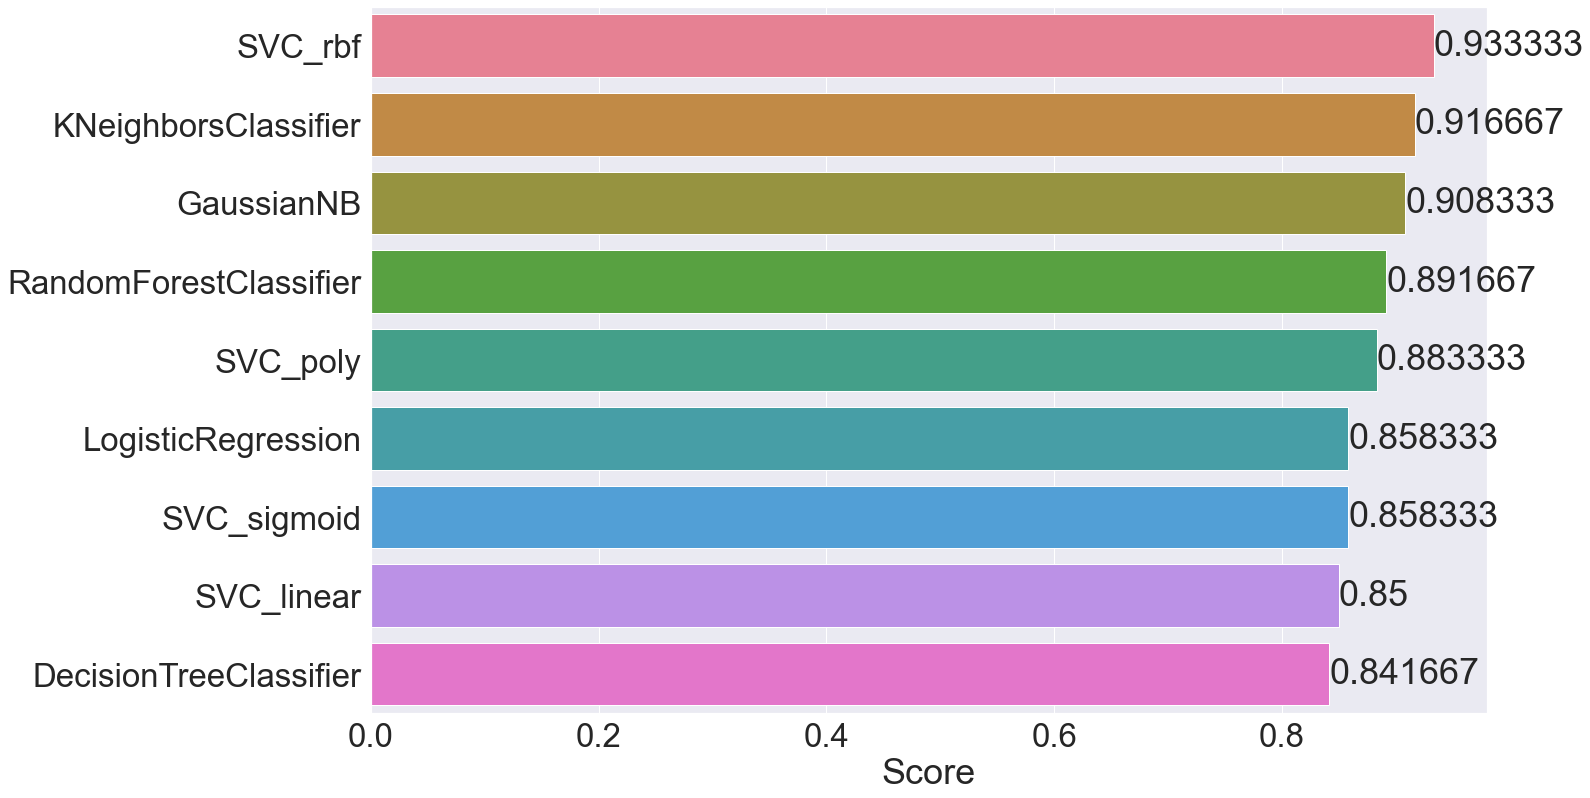

In [44]:
plt.figure(figsize = (20,13))
sns.set(font_scale = 3)
s = sns.barplot(x=scores.Score, y = scores.index, data = scores, palette="husl")
s.bar_label(s.containers[0]);

In [45]:
scores

,Score
SVC_rbf,0.933333
KNeighborsClassifier,0.916667
GaussianNB,0.908333
RandomForestClassifier,0.891667
SVC_poly,0.883333
LogisticRegression,0.858333
SVC_sigmoid,0.858333
SVC_linear,0.850000
DecisionTreeClassifier,0.841667


## ORSVM Kernels

In [46]:
#import orsvm

In [47]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()
#y_test = y_test.to_numpy()
#y_train = y_train.to_numpy()


In [48]:
model = orsvm.Model(kernel="Chebyshev",order=7,T=0.85,form='r', c = 3000)

NameError: name 'orsvm' is not defined

In [ ]:
Weights, SupportVectors, Bias, KernelInstance = model.ModelFit(X_train,y_train)

In [ ]:
scores['*ORSVM_Chebyshev*'] = model.ModelPredict(X_test, y_test, Bias, KernelInstance)

In [ ]:
model2 = orsvm.Model(kernel="Legendre",order=9,T = 0.85,form='r', c = 2000)
Weights, SupportVectors, Bias, KernelInstance = model2.ModelFit(X_train,y_train)

In [ ]:
scores['*ORSVM_Legendre*'] = model2.ModelPredict(X_test, y_test, Bias, KernelInstance)

In [ ]:
model3 = orsvm.Model(kernel="Gegenbauer",order=8,param1=0.5,T=0.85,form='r', c = 2000)
Weights, SupportVectors, Bias, KernelInstance = model3.ModelFit(X_train,y_train)

In [ ]:
scores['*ORSVM_Gegenbauer*'] = model3.ModelPredict(X_test, y_test, Bias, KernelInstance)

In [ ]:
model4 = orsvm.Model(kernel="Jacobi",order=7,param1=-0.8,param2=0.2,T=0.85,noise=0.1,form='r', c = 2000)
Weights, SupportVectors, Bias, KernelInstance = model4.ModelFit(X_train,y_train)

In [ ]:
scores['*ORSVM_Jacobi*'] = model4.ModelPredict(X_test, y_test, Bias, KernelInstance)

In [ ]:
scores = pd.DataFrame(scores, index=['Score']).transpose()
scores

In [ ]:
scores.sort_values(by = ['Score'], ascending = False, inplace = True)

In [ ]:

plt.figure(figsize = (20,13))
sns.set(font_scale = 3)
s = sns.barplot(x=scores.Score, y = scores.index, data = scores)
s.bar_label(s.containers[0]);

In [ ]:
scores

In [ ]:
scores.to_csv('scores.csv')